### Dependencies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.diagnostic import het_breuschpagan, het_white, linear_reset
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from statsmodels.tools import add_constant

# 1. Exploratory Data Analysis (EDA)

### 1.1  Inspect the Dataset

In [60]:
# Load the dataset
df = pd.read_csv("/Users/cayman/Downloads/social_behavior_dataset.csv")


In [61]:
# Display the first five rows
df.head()

,person_id,age_group,hours_of_sleep,exercise_per_week,income_satisfaction,social_interactions_per_week,stress_level,diet_quality_score,screen_time_hours,urban_rural,employment_status,relationship_status,religious_affiliation,political_alignment,sexual_orientation,music_listening_hours,favorite_tv_genre,pet_ownership,region,happiness_score,high_stress,depression_risk
0,1,60+,6.7,1,6.7,4,7.1,5.9,5.2,urban,unemployed,married,hindu,left,homosexual,0.4,reality,yes,east,4.5,yes,medium
1,2,26–40,8.1,4,7.2,7,6.5,1.4,2.7,urban,retired,divorced,christian,right,heterosexual,2.5,sports,no,west,5.0,no,medium
2,3,26–40,6.7,5,9.5,6,3.7,9.2,3.8,suburban,student,widowed,none,left,other,1.9,drama,yes,north,9.2,no,low
3,4,26–40,7.9,6,5.6,5,3.4,9.3,3.0,urban,retired,married,muslim,center,heterosexual,2.6,comedy,no,west,6.7,no,medium
4,5,26–40,7.0,3,3.9,7,4.0,2.6,2.6,suburban,student,widowed,christian,left,bisexual,1.9,comedy,yes,south,3.3,no,high


In [62]:
# Overview of column names, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   person_id                     2000 non-null   int64  
 1   age_group                     2000 non-null   object 
 2   hours_of_sleep                2000 non-null   float64
 3   exercise_per_week             2000 non-null   int64  
 4   income_satisfaction           2000 non-null   float64
 5   social_interactions_per_week  2000 non-null   int64  
 6   stress_level                  2000 non-null   float64
 7   diet_quality_score            2000 non-null   float64
 8   screen_time_hours             2000 non-null   float64
 9   urban_rural                   2000 non-null   object 
 10  employment_status             2000 non-null   object 
 11  relationship_status           2000 non-null   object 
 12  religious_affiliation         2000 non-null   object 
 13  pol

In [63]:
# Basic descriptive statistics (numerical columns)
df.describe(include="all")


,person_id,age_group,hours_of_sleep,exercise_per_week,income_satisfaction,social_interactions_per_week,stress_level,diet_quality_score,screen_time_hours,urban_rural,employment_status,relationship_status,religious_affiliation,political_alignment,sexual_orientation,music_listening_hours,favorite_tv_genre,pet_ownership,region,happiness_score,high_stress,depression_risk
count,2000.000000,2000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000,2000,2000,2000,2000,2000,2000.000000,2000,2000,2000,2000.000000,2000,2000
unique,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4,4,5,4,4,NaN,5,2,4,NaN,2,3
top,NaN,26–40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,suburban,unemployed,divorced,hindu,left,bisexual,NaN,drama,yes,north,NaN,no,medium
freq,NaN,816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,807,530,514,418,519,514,NaN,415,1241,527,NaN,1331,1136
mean,1000.500000,NaN,7.035050,3.006000,5.521650,5.08200,5.556350,5.519050,4.064400,NaN,NaN,NaN,NaN,NaN,NaN,1.943550,NaN,NaN,NaN,5.381800,NaN,NaN
std,577.494589,NaN,1.165253,2.002241,2.609381,2.27021,2.538029,2.627269,1.495801,NaN,NaN,NaN,NaN,NaN,NaN,1.216811,NaN,NaN,NaN,1.887032,NaN,NaN
min,1.000000,NaN,2.200000,0.000000,1.000000,0.00000,1.000000,1.000000,-1.200000,NaN,NaN,NaN,NaN,NaN,NaN,-2.200000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,500.750000,NaN,6.200000,1.000000,3.400000,3.00000,3.400000,3.200000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,4.100000,NaN,NaN
50%,1000.500000,NaN,7.000000,3.000000,5.500000,5.00000,5.500000,5.500000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,5.400000,NaN,NaN
75%,1500.250000,NaN,7.800000,5.000000,7.700000,7.00000,7.800000,7.900000,5.100000,NaN,NaN,NaN,NaN,NaN,NaN,2.800000,NaN,NaN,NaN,6.800000,NaN,NaN


In [64]:
# Shape of the dataset (rows, columns) and size
print(df.shape)
print(df.size)


(2000, 22)
44000


In [65]:
# Check for missing values in each column
df.isnull().sum()

person_id                       0
age_group                       0
hours_of_sleep                  0
exercise_per_week               0
income_satisfaction             0
social_interactions_per_week    0
stress_level                    0
diet_quality_score              0
screen_time_hours               0
urban_rural                     0
employment_status               0
relationship_status             0
religious_affiliation           0
political_alignment             0
sexual_orientation              0
music_listening_hours           0
favorite_tv_genre               0
pet_ownership                   0
region                          0
happiness_score                 0
high_stress                     0
depression_risk                 0
dtype: int64

### 1.2 Visualization

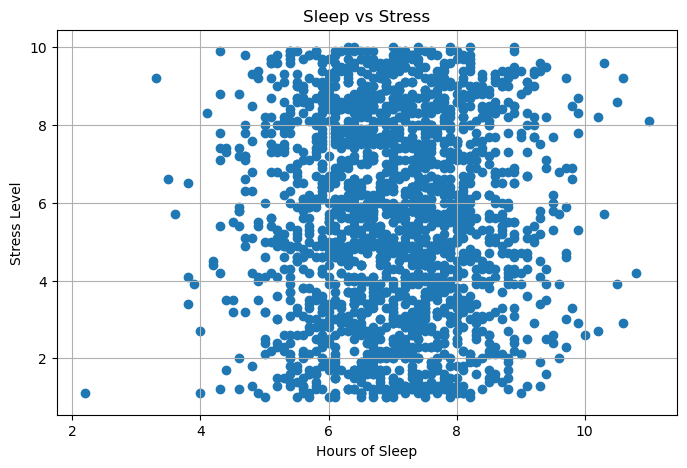

In [66]:
plt.figure(figsize=(8,5))
plt.scatter(df['hours_of_sleep'], df['stress_level'])
plt.xlabel('Hours of Sleep')
plt.ylabel('Stress Level')
plt.title('Sleep vs Stress')
plt.grid(True)
plt.show()

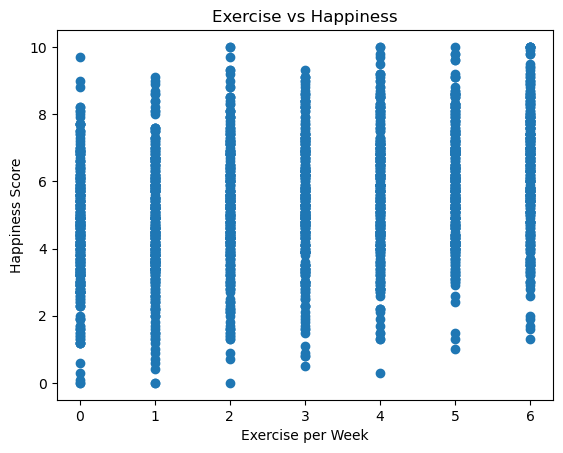

In [67]:
plt.figure()
plt.scatter(df["exercise_per_week"], df["happiness_score"])
plt.xlabel("Exercise per Week")
plt.ylabel("Happiness Score")
plt.title("Exercise vs Happiness")
plt.show()

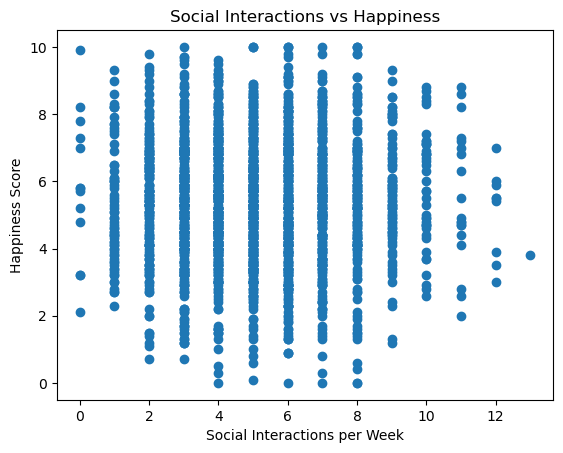

In [68]:
plt.figure()
plt.scatter(df["social_interactions_per_week"], df["happiness_score"])
plt.xlabel("Social Interactions per Week")
plt.ylabel("Happiness Score")
plt.title("Social Interactions vs Happiness")
plt.show()

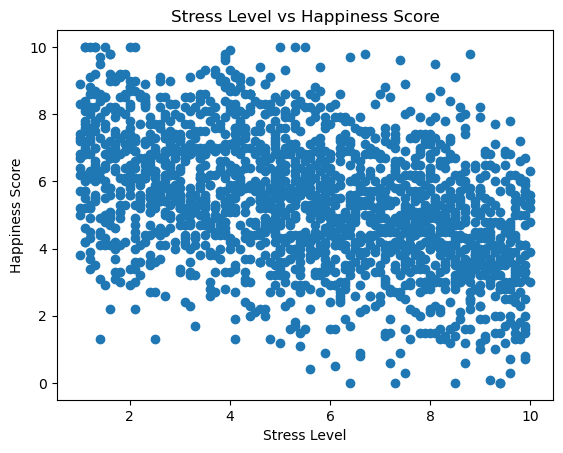

In [69]:
# Stress vs Happiness
plt.figure()
plt.scatter(df["stress_level"], df["happiness_score"])
plt.xlabel("Stress Level")
plt.ylabel("Happiness Score")
plt.title("Stress Level vs Happiness Score")
plt.show()

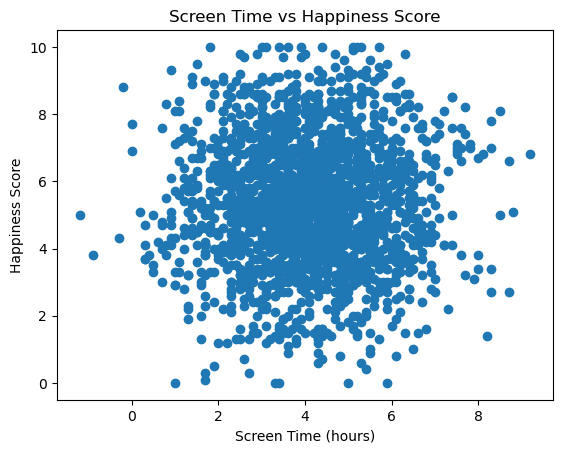

In [70]:
plt.figure()
plt.scatter(df["screen_time_hours"], df["happiness_score"])
plt.xlabel("Screen Time (hours)")
plt.ylabel("Happiness Score")
plt.title("Screen Time vs Happiness Score")
plt.show()

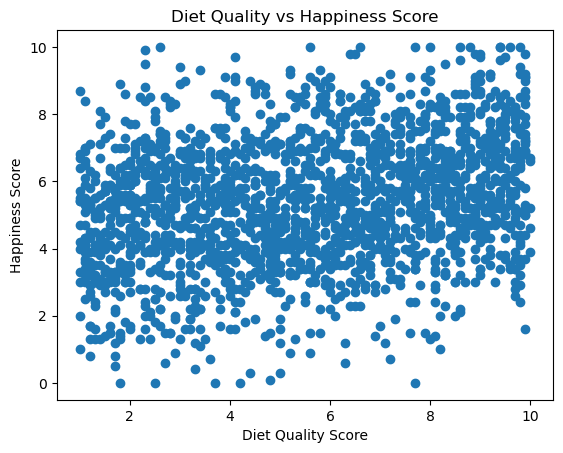

In [71]:
plt.figure()
plt.scatter(df["diet_quality_score"], df["happiness_score"])
plt.xlabel("Diet Quality Score")
plt.ylabel("Happiness Score")
plt.title("Diet Quality vs Happiness Score")
plt.show()

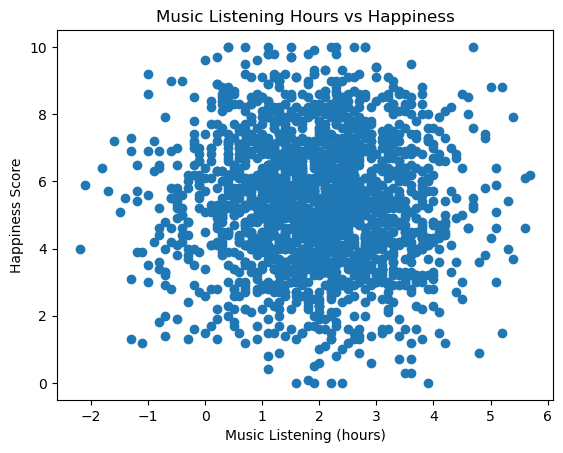

In [72]:
plt.figure()
plt.scatter(df["music_listening_hours"], df["happiness_score"])
plt.xlabel("Music Listening (hours)")
plt.ylabel("Happiness Score")
plt.title("Music Listening Hours vs Happiness")
plt.show()

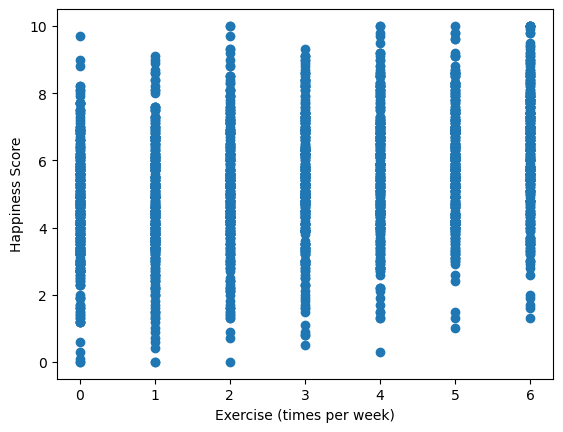

In [73]:
plt.figure()
plt.scatter(df["exercise_per_week"], df["happiness_score"])
plt.xlabel("Exercise (times per week)")
plt.ylabel("Happiness Score")
plt.show()

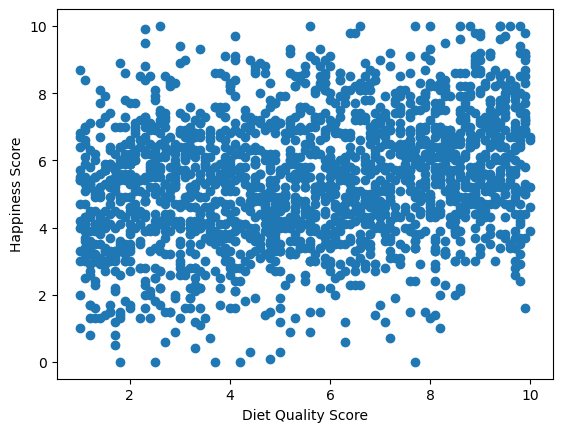

In [74]:
plt.figure()
plt.scatter(df["diet_quality_score"], df["happiness_score"])
plt.xlabel("Diet Quality Score")
plt.ylabel("Happiness Score")
plt.show()

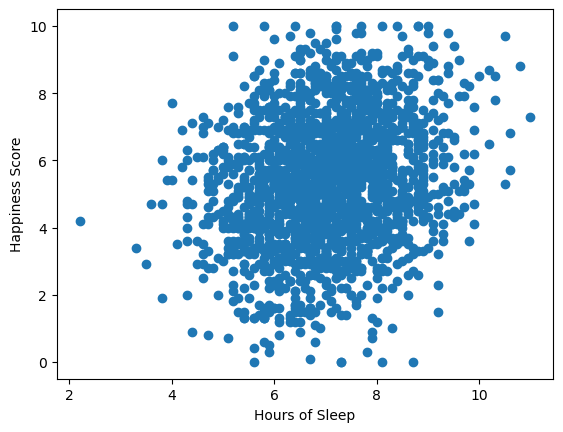

In [75]:
plt.figure()
plt.scatter(df["hours_of_sleep"], df["happiness_score"])
plt.xlabel("Hours of Sleep")
plt.ylabel("Happiness Score")
plt.show()

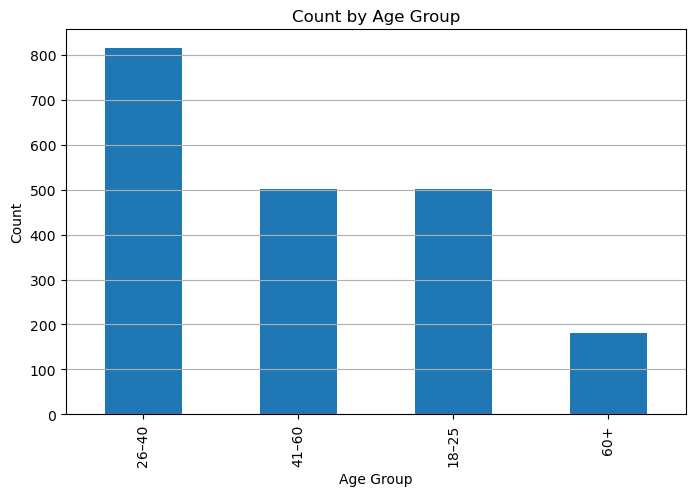

In [76]:
plt.figure(figsize=(8,5))
df['age_group'].value_counts().plot(kind='bar')
plt.title('Count by Age Group')
plt.ylabel('Count')
plt.xlabel('Age Group')
plt.grid(axis='y')
plt.show()

<Figure size 800x500 with 0 Axes>

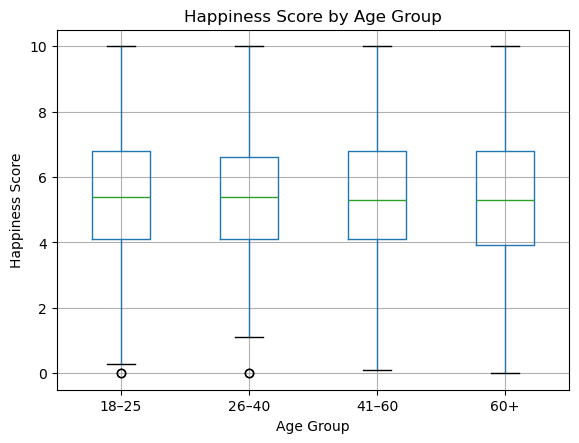

In [77]:
plt.figure(figsize=(8,5))
df.boxplot(column="happiness_score", by="age_group")
plt.title("Happiness Score by Age Group")
plt.suptitle("")
plt.xlabel("Age Group")
plt.ylabel("Happiness Score")
plt.show()

<Figure size 800x500 with 0 Axes>

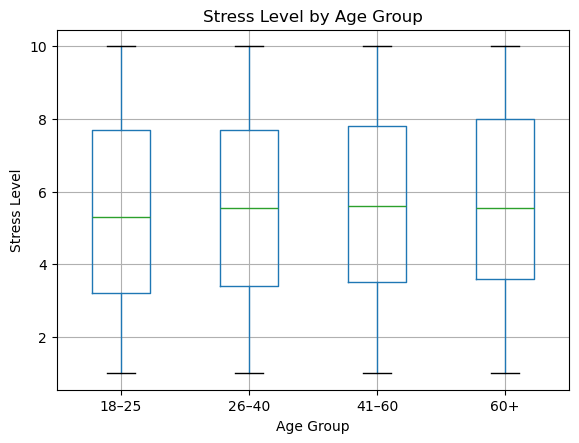

In [78]:
plt.figure(figsize=(8,5))
df.boxplot(column='stress_level', by='age_group')
plt.title('Stress Level by Age Group')
plt.suptitle('')  # remove automatic title
plt.xlabel('Age Group')
plt.ylabel('Stress Level')
plt.show()

# 2. Feature Selection Using Statistical Methods
- One-way ANOVA Test
- Correlation Test
- Chi square Test

### 2.1 Correlation

In [79]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_scores = numeric_df.corr()["happiness_score"].sort_values(ascending=False)

print("\n=== NUMERIC FEATURES — CORRELATION WITH HAPPINESS SCORE ===")
print(correlation_scores, "\n")


=== NUMERIC FEATURES — CORRELATION WITH HAPPINESS SCORE ===
happiness_score                 1.000000
exercise_per_week               0.298858
diet_quality_score              0.268889
hours_of_sleep                  0.208847
screen_time_hours               0.019928
social_interactions_per_week    0.015529
income_satisfaction            -0.023972
music_listening_hours          -0.031445
person_id                      -0.048592
stress_level                   -0.412942
Name: happiness_score, dtype: float64 



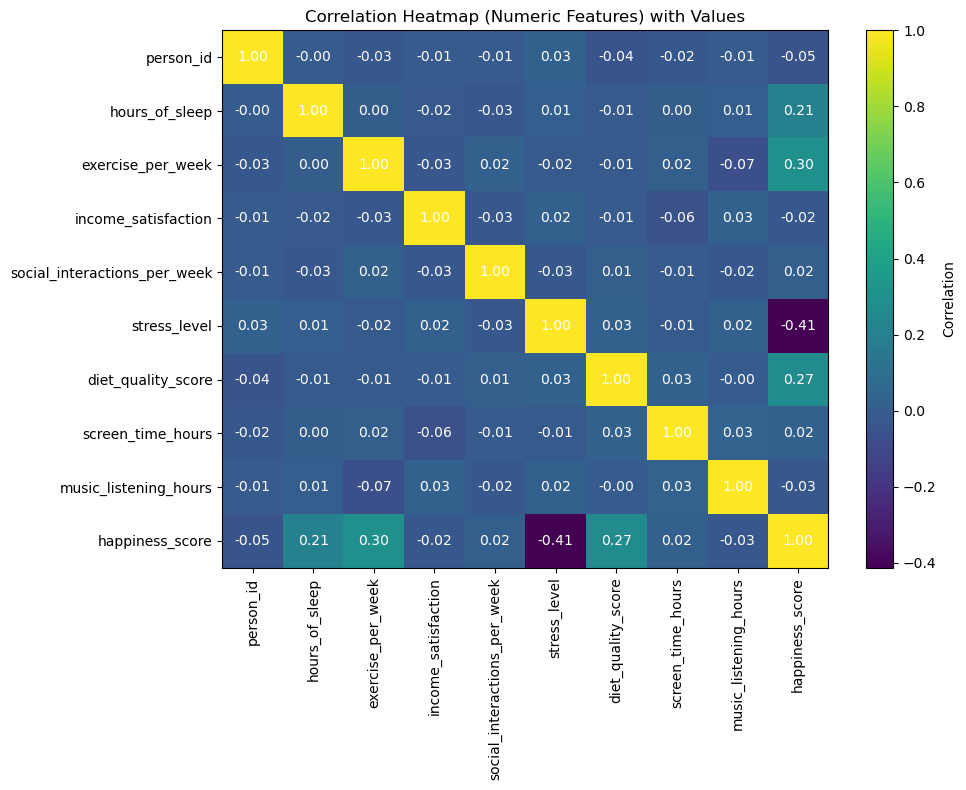

In [80]:
corr = numeric_df.corr()

# Plot heatmap with numbers
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="viridis", aspect="auto")
plt.colorbar(label="Correlation")

# Add numbers inside the heatmap
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        plt.text(j, i, f"{corr.iloc[i, j]:.2f}", 
                 ha='center', va='center', color='white')

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap (Numeric Features) with Values")
plt.tight_layout()
plt.show()

We choose the following three features for our model since they are the most positively correlated with the target variable (happiness score):

- exercise_per_week              r=0.298858
- diet_quality_score             r=0.268889
- hours_of_sleep                 r=0.208847

### 2.2 One-Way ANOVA

In [81]:
# ONE-WAY ANOVA (categorical predictors → numeric target)

from scipy import stats
categorical_cols = df.select_dtypes(include=['object']).columns
anova_results = {}

for col in categorical_cols:
    groups = [df[df[col] == level]["happiness_score"] for level in df[col].unique()]
    f_stat, pval = stats.f_oneway(*groups)
    anova_results[col] = pval

anova_results = pd.Series(anova_results).sort_values()

print("=== ONE-WAY ANOVA RESULTS (lower p-value = stronger predictor) ===")
print(anova_results, "\n")

=== ONE-WAY ANOVA RESULTS (lower p-value = stronger predictor) ===
depression_risk          0.000000e+00
high_stress              1.726532e-56
region                   1.800464e-02
employment_status        4.444151e-02
favorite_tv_genre        1.070415e-01
political_alignment      1.779904e-01
relationship_status      2.359189e-01
sexual_orientation       6.788791e-01
urban_rural              8.181250e-01
religious_affiliation    8.277716e-01
age_group                8.523677e-01
pet_ownership            8.973293e-01
dtype: float64 



### 2.3 Chi-Square Test

In [82]:
# Select only categorical variables (dtype = object or category)
categorical_df = df.select_dtypes(include=['object'])

# Show first rows + list of categorical columns
print(categorical_df.head())
print("\nCategorical variables:")
print(categorical_df.columns.tolist())

  age_group urban_rural employment_status  ... region high_stress depression_risk
0       60+       urban        unemployed  ...   east         yes          medium
1     26–40       urban           retired  ...   west          no          medium
2     26–40    suburban           student  ...  north          no             low
3     26–40       urban           retired  ...   west          no          medium
4     26–40    suburban           student  ...  south          no            high

[5 rows x 12 columns]

Categorical variables:
['age_group', 'urban_rural', 'employment_status', 'relationship_status', 'religious_affiliation', 'political_alignment', 'sexual_orientation', 'favorite_tv_genre', 'pet_ownership', 'region', 'high_stress', 'depression_risk']


A chi-square test checks whether two categorical variables are statistically associated.

- Low p-value (< 0.05) means dependence (association).

- High p-value (> 0.05) means independence (no relationship).

In [83]:
# Compute pairwise chi-square tests among categorical variables

# This code computes the chi-square test of independence for each pair of categorical variables in the dataset.

from scipy.stats import chi2_contingency

results = []

for i in range(len(categorical_cols)):
    for j in range(i+1, len(categorical_cols)):
        col1 = categorical_cols[i]
        col2 = categorical_cols[j]
        
        contingency = pd.crosstab(df[col1], df[col2])
        chi2, p, dof, exp = chi2_contingency(contingency)
        
        results.append({
            "Var1": col1,
            "Var2": col2,
            "p_value": p
        })


results_df = pd.DataFrame(results).sort_values("p_value")

# Display only significant pairs (p-value < 0.05)
significant_pairs = results_df[results_df["p_value"] < 0.05]
significant_pairs

,Var1,Var2,p_value
65,high_stress,depression_risk,1.270542e-42
64,region,depression_risk,1.469099e-02
24,employment_status,sexual_orientation,4.833938e-02


# 3. Multicollinearity
 - VIF < 5 → No meaningful multicollinearity
- VIF 5–10 → Moderate collinearity
- VIF > 10 → Serious multicollinearity

All features have VIF ≈ 2.3. Good!

In [84]:
# Compute VIF
X_const = add_constant(X)
vif = pd.DataFrame()
vif["Feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

vif

,Feature,VIF
0,const,44.416489
1,exercise_per_week,1.000207
2,diet_quality_score,1.000298
3,hours_of_sleep,1.000135


# 4. Modeling - Linear Regression

### 4.1 Dependencies

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.diagnostic import linear_reset
import matplotlib.pyplot as plt

### 4.2 Choose Features and Target Variable

In [86]:
# Features and target
X = df[["exercise_per_week", "diet_quality_score", "hours_of_sleep"]]
y = df["happiness_score"]


### 4.3 Create Training and Test Datasets

In [87]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.4 Standardize the Features

In [88]:
# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


### 4.5 Create the Linear Regression Model

In [89]:
import statsmodels.formula.api as smf

# Fit model aka train the model
model = smf.ols(formula = "happiness_score ~ exercise_per_week + diet_quality_score + hours_of_sleep",data=df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        happiness_score   R-squared:                       0.208
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     174.8
Date:                Fri, 21 Nov 2025   Prob (F-statistic):          1.24e-100
Time:                        10:23:00   Log-Likelihood:                -3874.1
No. Observations:                2000   AIC:                             7756.
Df Residuals:                    1996   BIC:                             7779.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              1.0397      0

### 4.6 Regression Evaluation Metrics

In [90]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# True and predicted values
y_pred = model.predict(df)

# Metrics
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)


MSE: 2.8185202619114835
MAE: 1.3652918192966073
RMSE: 1.678844918958116


### 4.7 Ramsey RESET test
- Used to detect non-linearity or model misspecification.
- If p > 0.05: No evidence of non-linearity, model functional form is acceptable, no missing nonlinear terms needed

In [91]:
reset_test = linear_reset(model, power=2, use_f=True)
print("\nRESET test:\n", reset_test)



RESET test:
 <F test: F=0.013861258984194583, p=0.9062903980648893, df_denom=2e+03, df_num=1>


### 4.8 Model Assumptions
- Residual plots (generated below) should show random scatter. No heterscedasticity. Good.
- Residuals are also normally distributed.

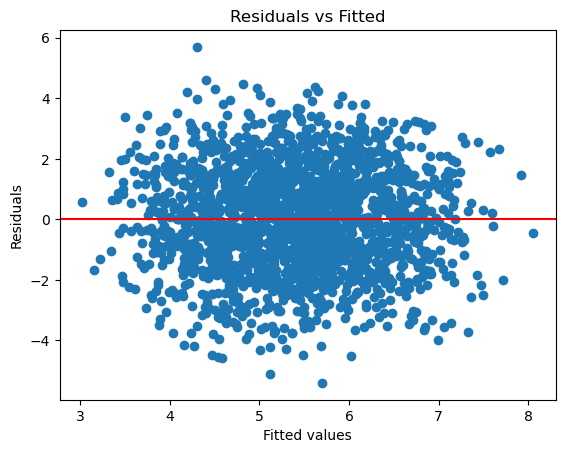

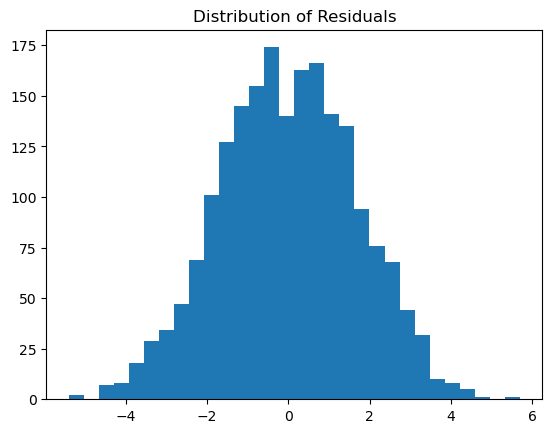

In [92]:
# Residual plots
residuals = model.resid

plt.figure()
plt.scatter(model.fittedvalues, residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

plt.figure()
plt.hist(residuals, bins=30)
plt.title("Distribution of Residuals")
plt.show()
